<a href="https://colab.research.google.com/github/huune2k/BTVN_AI_8-8-2022/blob/main/Cifar100_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from tensorflow.keras.optimizers import RMSprop
from keras.backend import categorical_crossentropy

from keras.utils import np_utils
import cv2 as cv

In [ ]:
(x_train, y_train),(x_test,y_test)= cifar100.load_data()
x=x_test
#print(x_train[0])

In [ ]:
#convert into grayscale
x_train = np.array([cv.cvtColor(image, cv.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv.cvtColor(image, cv.COLOR_BGR2GRAY) for image in x_test])
print(x_test)
print(x_train)

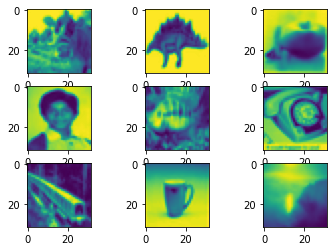

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train=x_train.reshape(50000,1024)
x_test=x_test.reshape(10000,1024)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)
print(y_train.shape)
print(y_test.shape)

(50000, 100)
(10000, 100)


In [ ]:
model = Sequential()

model.add(Dense(512, activation='relu',input_shape=(1024,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
Total params: 838,756
Trainable params: 838,756
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=RMSprop(),
    loss= categorical_crossentropy,
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(x_train, y_train, batch_size =500 , epochs=20, verbose=1, validation_data=(x_test,y_test))

Epoch 1/20
100/100 [==============================] - 1s 9ms/step - loss: 3.8435 - accuracy: 0.1327 - val_loss: 3.7853 - val_accuracy: 0.1526
Epoch 2/20
100/100 [==============================] - 1s 9ms/step - loss: 3.4668 - accuracy: 0.1869 - val_loss: 3.7121 - val_accuracy: 0.1659
Epoch 3/20
100/100 [==============================] - 1s 9ms/step - loss: 3.3889 - accuracy: 0.1985 - val_loss: 3.7283 - val_accuracy: 0.1657
Epoch 4/20
100/100 [==============================] - 1s 9ms/step - loss: 3.3495 - accuracy: 0.2053 - val_loss: 3.7239 - val_accuracy: 0.1615
Epoch 5/20
100/100 [==============================] - 1s 9ms/step - loss: 3.3252 - accuracy: 0.2097 - val_loss: 3.6963 - val_accuracy: 0.1698
Epoch 6/20
100/100 [==============================] - 1s 9ms/step - loss: 3.2967 - accuracy: 0.2136 - val_loss: 3.7074 - val_accuracy: 0.1684
Epoch 7/20
100/100 [==============================] - 1s 9ms/step - loss: 3.2819 - accuracy: 0.2151 - val_loss: 3.7166 - val_accuracy: 0.1695
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


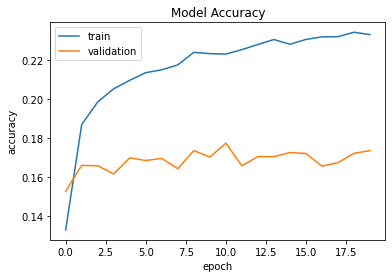

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')

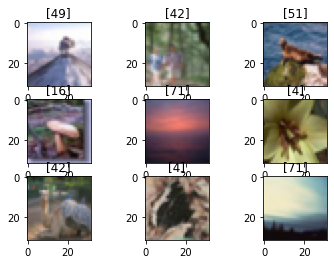

In [ ]:
y_pred = model.predict(x_test)
for i in range (9):
  plt.subplot(330+i+1)
  plt.imshow(x[i])
  plt.title([np.argmax(y_pred[i])])
plt.show()